### Manejo de valores faltantes

##### CASO: Empresa de investigación de petróleo “PetrolInsights”
El enfoque de PetrolInsights está en el monitoreo, análisis y prevención de derrames de petróleo a nivel mundial. La empresa utiliza tecnología de punta y análisis de datos para entender mejor las causas, efectos, y tendencias de los derrames de petróleo, con el fin de asesorar a gobiernos y empresas del sector en la toma de decisiones estratégicas para minimizar el impacto ambiental y económico de estos desastres.

PetrolInsights se enfrenta a un desafío significativo: 

Los derrames de petróleo son eventos complejos influenciados por numerosos factores, incluidas condiciones meteorológicas extremas, fallas técnicas, errores humanos, y condiciones geopolíticas. La gestión y prevención de derrames requiere una comprensión profunda de estos factores, así como la capacidad para predecir y responder rápidamente a posibles incidentes.

Para abordar este desafío, PetrolInsights ha recopilado un gran conjunto de datos sobre derrames de petróleo ocurridos en todo el mundo, incluyendo detalles como la fecha, ubicación, cantidad de petróleo derramado, y posibles causas. Este conjunto de datos, obtenido de fuentes confiables y mantenido en constante actualización, es una herramienta invaluable para el análisis y la toma de decisiones basada en datos.

Por esta razón y para lograr resultados, te contrataron como analista de datos. En esta oportunidad se te solicita que apliques el proceso EDA (Análisis Exploratorio de Datos) sobre el dataset brindado. 

In [81]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [82]:
df_oil = pd.read_csv("datos_oil.csv") # Cargamos dataset

print(df_oil.head())

                     Spill / Vessel  \
0   2023 Princess Empress oil spill   
1  2022 Keystone Pipeline oil spill   
2   2022 Chesire oil truck rollover   
3             2022 Callao oil spill   
4        2021 New Orleans oil spill   

                                       Location             Dates  Min Tonnes  \
0           Philippines, Pola, Oriental Mindoro  28 February 2023      881.00   
1      United States, Washington County, Kansas   7 December 2022    18516.94   
2          United States, Cheshire, Connecticut  11 February 2022       62.98   
3             Ventanilla District, Callao, Peru   15 January 2022     1626.39   
4  United States, St. Bernard Parish, Louisiana  27 December 2021      944.11   

   Max Tonnes                       Owner        Country  
0      881.00  RDC Reield Marine Services    Philippines  
1    18516.94                   TC Energy  United States  
2       62.98      Libretti and Sons Fuel  United States  
3     1861.68                      Repsol 

In [153]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Spill / Vessel   34 non-null     object        
 1   Location         34 non-null     object        
 2   Dates            34 non-null     datetime64[ns]
 3   Min Tonnes       26 non-null     float64       
 4   Max Tonnes       26 non-null     float64       
 5   Owner            30 non-null     object        
 6   Country          34 non-null     object        
 7   Formatted Dates  34 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [84]:
nan_oil=df_oil.isna() # Verificamos columnas con valores nan, utilizando isna()
nan_oil # Seguimos el consejo de Bryan (y creo que tambien Mariano), en lugar de utilizar print

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,True,True,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [85]:
print(nan_oil) # Aqui usamos print como en la lecture

    Spill / Vessel  Location  Dates  Min Tonnes  Max Tonnes  Owner  Country
0            False     False  False       False       False  False    False
1            False     False  False       False       False  False    False
2            False     False  False       False       False  False    False
3            False     False  False       False       False  False    False
4            False     False  False       False       False  False    False
5            False     False  False       False       False  False    False
6            False     False  False        True        True  False    False
7            False     False  False       False       False  False    False
8            False     False  False       False       False  False    False
9            False     False  False       False       False  False    False
10           False     False  False       False       False  False    False
11           False     False  False       False       False  False    False
12          

Podemos filtrar aquellas filas donde existen valores nan en la columna “Owner”:

In [86]:
# Filas con NaN en 'Owner'

nan_in_oil=nan_oil[df_oil['Owner'].isna()] # Utilizamos una mascara
print(nan_in_oil)

    Spill / Vessel  Location  Dates  Min Tonnes  Max Tonnes  Owner  Country
12           False     False  False       False       False   True    False
16           False     False  False       False       False   True    False
24           False     False  False        True        True   True    False
25           False     False  False        True        True   True    False


En un caso extremo (y para ver cómo funciona), eliminamos todas las filas con valores faltantes. 

In [87]:
# Eliminar filas que contienen al menos un valor faltante
df_sin_nan=df_oil.dropna() # Lo eliminamos del archivo original. Reaslmente estamos haciendo una copia del archivo original sin faltantes
df_sin_nan

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,RDC Reield Marine Services,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,TC Energy,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,Libretti and Sons Fuel,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Repsol,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,PBF Energy,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,Amplify Energy,United States
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,Chevron Corporation,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,Colonial Pipeline,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,PetrÃƒÆ’Ã†â€™Ãƒâ€ Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â³...,Venezuela
10,Trans Mountain oil spill,"Canada, British Columbia, Abbotsford",14 June 2020,118.50,184.87,Trans Mountain,Canada


In [88]:
# Verificamos por mi cuenta las dimensiones (forma)
print(np.shape(df_oil))
print(np.shape(df_sin_nan))

(34, 7)
(24, 7)


Ten en cuenta que por defecto dropna() siempre trabaja sobre filas, para actuar sobre columnas, se debe establecer el atributo axis=1

In [89]:
# Eliminar columnas en lugar de fila
df_sin_nan_col=df_oil.dropna(axis=1)
df_sin_nan_col

,Spill / Vessel,Location,Dates,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,Venezuela


In [90]:
np.shape(df_sin_nan_col)

(34, 4)

También podríamos controlar la eliminación mediante el atributo how.

In [91]:
# Por ejemplo, 'how='all'' eliminará filas donde todos los valores son NaN.
df_oil_row = df_oil.dropna(how='all') # Tiene que ser todos los valores, no uno solo.
# Al utilizar el 'any' funciona si al menos un valor es NaN

print(np.shape(df_oil_row))
df_oil_row


(34, 7)


,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,RDC Reield Marine Services,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,TC Energy,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,Libretti and Sons Fuel,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Repsol,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,PBF Energy,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,Amplify Energy,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,NaN,NaN,Emerald Marine Ltd,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,Chevron Corporation,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,Colonial Pipeline,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,PetrÃƒÆ’Ã†â€™Ãƒâ€ Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â³...,Venezuela


##### df.fillna(): 
se utiliza para reemplazar los valores NaN por un valor específico, que puede ser un número, un string, o incluso un método de imputación como el valor anterior (ffill) o el siguiente (bfill) en el DataFrame. 

Esto es especialmente útil cuando se asume que la ausencia de datos puede ser sustituida por un valor promedio, mediano, o cualquier otro valor representativo sin afectar significativamente la calidad del análisis.

Para avanzar con esto, recarga tu dataset y rellena los NaN con 0.

In [92]:
# Rellenamos todos los NaN con 0
df_filled_oil=df_oil.fillna(0)
df_filled_oil

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,RDC Reield Marine Services,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,TC Energy,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,Libretti and Sons Fuel,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Repsol,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,PBF Energy,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,Amplify Energy,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,0.00,0.00,Emerald Marine Ltd,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,Chevron Corporation,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,Colonial Pipeline,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,PetrÃƒÆ’Ã†â€™Ãƒâ€ Ã¢â‚¬â„¢ÃƒÆ’Ã¢â‚¬Å¡Ãƒâ€šÃ‚Â³...,Venezuela


También podemos aplicar el atributo method para ffill y bfill.

In [93]:
# Rellenando NaN con el último valor válido anterior
df_ffill_oil = df_oil.fillna(method='ffill')
# df.ffill() Ahora se utiliza este  seira df_ffill_oil.ffill
print(df_ffill_oil)

# Rellenando NaN con el siguiente valor válido
df_bfill_oil = df_oil.fillna(method='bfill')
# df.bfill() Ahora es asi
print(df_bfill_oil)


                                       Spill / Vessel  \
0                     2023 Princess Empress oil spill   
1                    2022 Keystone Pipeline oil spill   
2                     2022 Chesire oil truck rollover   
3                               2022 Callao oil spill   
4                          2021 New Orleans oil spill   
5                        2021 Orange County oil spill   
6                2021 Mediterranean oil spill/Emerald   
7                           Chevron Richmond Refinery   
8                    2020 Colonial Pipeline oil spill   
9                                  El Palito Refinery   
10                           Trans Mountain oil spill   
11                          Norilsk diesel fuel spill   
12      Tanker truck pumping out sludge from a vessel   
13              T.G. Williams Well No. 1 tank battery   
14                          Greka Energy oil facility   
15                                  True Oil pipeline   
16                             

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4784\1139210086.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_oil = df_oil.fillna(method='ffill')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4784\1139210086.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill_oil = df_oil.fillna(method='bfill')


Podríamos reemplazar tanto los valores numéricos como de texto, por una valor específico en una columna determinada:

In [94]:
# Reemplazando NaN solo en la columna 'Owner'
df_oil['Owner'] = df_oil['Owner'].fillna("No especificada")
nan_oil = df_oil.isna()

print(nan_oil)


    Spill / Vessel  Location  Dates  Min Tonnes  Max Tonnes  Owner  Country
0            False     False  False       False       False  False    False
1            False     False  False       False       False  False    False
2            False     False  False       False       False  False    False
3            False     False  False       False       False  False    False
4            False     False  False       False       False  False    False
5            False     False  False       False       False  False    False
6            False     False  False        True        True  False    False
7            False     False  False       False       False  False    False
8            False     False  False       False       False  False    False
9            False     False  False       False       False  False    False
10           False     False  False       False       False  False    False
11           False     False  False       False       False  False    False
12          

##### np.nan: 
NumPy trata los valores faltantes como np.nan (Not a Number). Aunque no es un método per se, es importante entender cómo NumPy gestiona estos valores para aplicar operaciones aritméticas o lógicas. Las operaciones con np.nan siempre resultan en np.nan, lo cual es relevante al realizar cálculos y análisis estadísticos.

Aquí tienes un ejemplo de las implicancias de este punto:

In [96]:
# Para solucionar lo anterior

# Creación de un array con np.nan
array = np.array([1, np.nan, 3])

# Intento de cálculo de la media
mean_value = np.nanmean(array) # para ignorar el nan, los valores nulos

print("Media:", mean_value)

Media: 2.0


Al intentar calcular la media de un array que contiene np.nan, el resultado de np.mean(array) será np.nan, mostrando cómo la presencia de np.nan afecta los cálculos estadísticos, haciendo que el resultado de la operación también sea np.nan.

np.isnan(): esta función se utiliza para detectar la presencia de valores NaN dentro de un array de NumPy. Produce un array booleano que marca con True los lugares donde los elementos son np.nan. Es una herramienta esencial para filtrar datos antes de realizar cálculos que podrían verse afectados por valores faltantes.

Funciones agnósticas a NaN: NumPy incluye versiones "seguras para NaN" de varias funciones estadísticas, como np.nanmean(), np.nanmedian(), np.nansum(), entre otras. Estas versiones calculan el resultado mientras ignoran los valores np.nan en los arrays, lo cual permite obtener sumas, medias, medianas, etc., sin tener que limpiar explícitamente los valores faltantes de antemano.

### Normalización y transformación de datos

Hemos repasado lo importante que resulta la identificación y manipulación de valores faltantes. Cuando se trata de seguir preparando nuestro dataset para un análisis adecuado, la eliminación o sustitución de valores faltantes, la agregación de nuevos datos, hasta la reorganización de la estructura de nuestro df resulta clave para nuestro análisis. Cada método tiene atributos específicos que permiten una gran flexibilidad y potencia en el manejo de datos. A continuación desarrollaremos algunos de ellos.

##### dropna():

Podríamos por ejemplo, eliminar una o múltiples columnas por nombre de la siguiente manera:

In [97]:
# Eliminar una columna por nombre
df_sin_owner=df_oil.drop('Owner', axis=1) # Por ser una sola columna no necesita [ ]
df_sin_owner

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,NaN,NaN,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,Venezuela


 Eliminando múltiples columnas por nombre:

In [98]:
# columnas_para_eliminar=['Owner','Location'] y la ponemos dentro de la informacion
df_drop_oil=df_oil.drop(['Owner','Location'],axis=1) # Cuando son varias columnas van entre [ ]
df_drop_oil

,Spill / Vessel,Dates,Min Tonnes,Max Tonnes,Country
0,2023 Princess Empress oil spill,28 February 2023,881.00,881.00,Philippines
1,2022 Keystone Pipeline oil spill,7 December 2022,18516.94,18516.94,United States
2,2022 Chesire oil truck rollover,11 February 2022,62.98,62.98,United States
3,2022 Callao oil spill,15 January 2022,1626.39,1861.68,Peru
4,2021 New Orleans oil spill,27 December 2021,944.11,944.11,United States
5,2021 Orange County oil spill,1 October 2021,424.42,424.42,United States
6,2021 Mediterranean oil spill/Emerald,11 February 2021,NaN,NaN,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,9 February 2021,1.90,1.90,United States
8,2020 Colonial Pipeline oil spill,14 August 2020,63000.00,63000.00,United States
9,El Palito Refinery,8 August 2020,2700.00,2700.00,Venezuela


Por otra parte, el argumento inplace te permite modificar el DataFrame original sin necesidad de asignarlo a una nueva variable. 

Si inplace=True, la operación se realiza en el lugar y el DataFrame se actualiza. 
Por defecto, es False, lo que significa que la operación devuelve un nuevo DataFrame y el original permanece sin cambios.

Veamos un ejemplo eliminando una columna en el lugar:

In [99]:
# Eliminando uan columna en el lugar
df_oil.drop('Owner',axis=1,inplace=True) # Por defecto inplace es False
df_oil

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,NaN,NaN,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,Venezuela


También existe la posibilidad de eliminar una o varias filas a partir de su ubicación. 

#### Ejercicio externo
https://www.freecodecamp.org/espanol/news/eliminar-la-lista-de-filas-del-dataframe-de-pandas/
Sugereido dentro de la lecture (limpieza y preparacion de datos)

In [100]:
data = {"nombre_producto":["Teclado","Raton", "Monitor", "CPU","CPU", "Altavoces",pd.NaT],
        "precio_unitario":[500, 200, 5000.235, 10000.550, 10000.550, 250.50,None],
        "num_de_unidades":[5, 5, 10, 20, 20, 8, pd.NaT],
        "cantidad disponible":[5, 6, 10, "no disponible", "no disponible", pd.NaT, pd.NaT],
        "disponible_desde_fecha":['5/11/2021', '23/4/2021', '21/08/2021', '18/09/2021', '18/09/2021', '05/01/2021', pd.NaT]
       }

df = pd.DataFrame(data)

df

,nombre_producto,precio_unitario,num_de_unidades,cantidad disponible,disponible_desde_fecha
0,Teclado,500.000,5,5,5/11/2021
1,Raton,200.000,5,6,23/4/2021
2,Monitor,5000.235,10,10,21/08/2021
3,CPU,10000.550,20,no disponible,18/09/2021
4,CPU,10000.550,20,no disponible,18/09/2021
5,Altavoces,250.500,8,NaT,05/01/2021
6,NaT,NaN,NaT,NaT,NaT


In [101]:
# Eliminamos fila 5 y 6 utilizando drop
df.drop([5,6], axis=0, inplace=True) # Igual funciona sin el axis=0 al ser el predeterminado
df

,nombre_producto,precio_unitario,num_de_unidades,cantidad disponible,disponible_desde_fecha
0,Teclado,500.000,5,5,5/11/2021
1,Raton,200.000,5,6,23/4/2021
2,Monitor,5000.235,10,10,21/08/2021
3,CPU,10000.550,20,no disponible,18/09/2021
4,CPU,10000.550,20,no disponible,18/09/2021


In [102]:
# Eliminamos filas de un intervalo, utilizando df.index
df.drop(df.index[2:4], inplace=True) # Limite inferior inclusivo mientras que exterior es exclusivo. Se elimina 2 pero no el 4
df

,nombre_producto,precio_unitario,num_de_unidades,cantidad disponible,disponible_desde_fecha
0,Teclado,500.00,5,5,5/11/2021
1,Raton,200.00,5,6,23/4/2021
4,CPU,10000.55,20,no disponible,18/09/2021


In [103]:
# Eliminacion de todas las filas despues de un indice con iloc[ ]
df = df.iloc[:2] # Eliminamos todo despues del indice, es decir a partir del 2. Realmente elimina todo lo que este fuera del indici
# de tal manera que si hago df = df.iloc[1:2], me elimina tambien la 0, es decir protege o guarda la 1 solamente (lo definido en el indice)

df

,nombre_producto,precio_unitario,num_de_unidades,cantidad disponible,disponible_desde_fecha
0,Teclado,500.0,5,5,5/11/2021
1,Raton,200.0,5,6,23/4/2021


In [104]:
# Eliminamos filas que cumplan una condicion con drop
df.drop(df[(df['precio_unitario'] >400) & (df['precio_unitario'] < 600)].index, inplace=True)

df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4784\1478215292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['precio_unitario'] >400) & (df['precio_unitario'] < 600)].index, inplace=True)


,nombre_producto,precio_unitario,num_de_unidades,cantidad disponible,disponible_desde_fecha
1,Raton,200.0,5,6,23/4/2021


En el código anterior,
(df['Unit_Price'] >400) & (df['Unit_Price'] < 600) es la condición para eliminar las filas.
df[].index selecciona los índices de las filas que cumplen la condición.
inplace=True realiza la operación de eliminado sobre el mismo DataFrame, en lugar de crear y devolver uno nuevo.

#### Fin Ejercicio externo

### data.replace() 
sustituye valores en un DataFrame o Serie, permitiendo reemplazos basados en coincidencias exactas o patrones.

Veamos cómo reemplazar valores específicos:

In [105]:
# Remplazando valores especificos (El valor sin importar en que columna lo encuentre)
df_remplazado = df_oil.replace('Chevron Richmond Refinery', 'Chevron') # Cuando encuentre el primero cambiemelo por le segundo
df_remplazado

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,NaN,NaN,Israel and Lebanon (since this location refers...
7,Chevron,"United States, Richmond, California",9 February 2021,1.90,1.90,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,Venezuela


Para un control más fino, puedes usar un diccionario para especificar reemplazos diferentes para valores diferentes. Esto es especialmente útil cuando necesitas reemplazos específicos para columnas específicas.

In [106]:
df_oil

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,NaN,NaN,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,Venezuela


In [107]:
# Reemplazando valores específicos en columnas específicas
reemplazos = {'Owner': {'Chevron': 'Chevron Corporation'}, 'Location': {'United States, Washington County, Kansas': 'United States, Washington, Kansas'}}
# Lo primero es lo que tenemos y lo sgundo porque va a ser remplazado
# Definimos columna, el dato a buscar y luego el dato a cambiar
df_reemplazo_dict = df_oil.replace(reemplazos)

df_reemplazo_dict


,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,Philippines
1,2022 Keystone Pipeline oil spill,"United States, Washington, Kansas",7 December 2022,18516.94,18516.94,United States
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Peru
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,United States
5,2021 Orange County oil spill,"United States, Orange County, California shore...",1 October 2021,424.42,424.42,United States
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",11 February 2021,NaN,NaN,Israel and Lebanon (since this location refers...
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,United States
9,El Palito Refinery,"Venezuela, Golfo Triste",8 August 2020,2700.00,2700.00,Venezuela


##### pd.concat(). 
Esta función permite concatenar objetos pandas como DataFrame y Series a lo largo de un eje particular, con opciones adicionales de manejo de índices y otros aspectos. 

Puedes concatenar a lo largo de cualquiera de los ejes (0 para filas, 1 para columnas).

En el siguiente ejemplo combinamos los dataframes trabajados:

In [108]:
# Cargamos nuevamente nuestra dataset asignando un nombre distinto
df_oil_append = pd.read_csv("datos_oil.csv")

# Utilizando pd.concat() para combinar los DataFrame
df_oil_updated = pd.concat([df_oil, df_oil_append], ignore_index=True) # ignore_index=True ignoramos los indices y los vuelve a asignar

#print(df_oil_updated)
df_oil_updated


,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country,Owner
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",28 February 2023,881.00,881.00,Philippines,NaN
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,United States,NaN
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States,NaN
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",15 January 2022,1626.39,1861.68,Peru,NaN
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",27 December 2021,944.11,944.11,United States,NaN
...,...,...,...,...,...,...,...
63,East River insulating oil spill,"United States, New York",7 May 2017,97.00,101.00,United States,Con Edison
64,Energy Transfer Partners Dakota Access Pipelin...,"United States, North Dakota",4 April 2017,0.27,0.27,United States,Energy Transfer Partners
65,Ennore oil spill,"India, Chennai, Ennore Port",28 January 2017,251.00,251.00,India,Darya Shipping Solutions
66,Belle Fourche pipeline leak,"United States, North Dakota, Billings County, ...",5 December 2016,571.00,571.00,United States,Belle Fourche Pipeline Company


In [109]:
print(df_oil_updated)

                                       Spill / Vessel  \
0                     2023 Princess Empress oil spill   
1                    2022 Keystone Pipeline oil spill   
2                     2022 Chesire oil truck rollover   
3                               2022 Callao oil spill   
4                          2021 New Orleans oil spill   
..                                                ...   
63                    East River insulating oil spill   
64  Energy Transfer Partners Dakota Access Pipelin...   
65                                   Ennore oil spill   
66                        Belle Fourche pipeline leak   
67                            Fox Creek pipeline leak   

                                             Location             Dates  \
0                 Philippines, Pola, Oriental Mindoro  28 February 2023   
1            United States, Washington County, Kansas   7 December 2022   
2                United States, Cheshire, Connecticut  11 February 2022   
3              

En este ejemplo, pd.concat() toma una lista de DataFrame ([df_oil, df_oil_append]) y los une a lo largo del eje de las filas (el valor predeterminado para axis es 0). 

La opción ignore_index=True indica que no queremos retener los índices originales de df_oil y df_oil_append; en su lugar, queremos que pandas asigne un nuevo índice entero que vaya de 0 a n-1, donde n es el número total de filas en el DataFrame resultante.

#### nunique: Nos ayuda encontrar los valore sunicos para nuestrso atributos

In [110]:
df_oil.nunique()

Spill / Vessel    34
Location          34
Dates             32
Min Tonnes        26
Max Tonnes        26
Country           17
dtype: int64

In [111]:
df_oil_append.nunique()

Spill / Vessel    34
Location          34
Dates             32
Min Tonnes        26
Max Tonnes        26
Owner             29
Country           17
dtype: int64

#### sort_values(by=) Nos ordena valores de acuerdo a la indicacion

In [112]:
df_oil.sort_values(by='Min Tonnes')

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
21,MV Chrysanthi S bunkering spill at sea,"South Africa, Algoa Bay, Port of Ngqura",6 July 2019,0.20,0.40,South Africa
30,Energy Transfer Partners Dakota Access Pipelin...,"United States, North Dakota",4 April 2017,0.27,0.27,United States
12,Tanker truck pumping out sludge from a vessel,"New Zealand, Tauranga, Bay of Plenty",30 March 2020,1.70,1.70,New Zealand
7,Chevron Richmond Refinery,"United States, Richmond, California",9 February 2021,1.90,1.90,United States
16,Tanker truck rollover,"United States, California, Santa Maria, Cuyama...",21 March 2020,14.60,19.50,United States
20,Guarello Island iron ore export terminal diese...,"Chile, Guarello Island, Magallanes Region",27 July 2019,35.40,35.40,Chile
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",11 February 2022,62.98,62.98,United States
22,MV Solomon Trader fuel oil spill,"Solomon Islands, Rennell Island",5 February 2019,75.00,80.00,Solomon Islands
29,East River insulating oil spill,"United States, New York",7 May 2017,97.00,101.00,United States
10,Trans Mountain oil spill,"Canada, British Columbia, Abbotsford",14 June 2020,118.50,184.87,Canada


#### nlargest
Nos trae n numeros de filas de los valores mas grandes segun indicaciones

In [113]:
df_oil.nlargest(n=3, columns='Min Tonnes')
# df_oil.nlargest(n=3, columns='Min Tonnes')[:5] para quedarnos con 5 sin en el nlargest, aunque no seira el mejor ejemplo

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
26,Sanchi oil tanker collision with CF Crystal,East China Sea,6 January 2018,138000.00,138000.00,East China Sea (associated with multiple count...
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,United States
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,United States


#### nsmallest
Nos trae n numeros de filas de los valores mas pequeños segun indicaciones

In [114]:
df_oil.nsmallest(n=3, columns='Min Tonnes')

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Country
21,MV Chrysanthi S bunkering spill at sea,"South Africa, Algoa Bay, Port of Ngqura",6 July 2019,0.20,0.40,South Africa
30,Energy Transfer Partners Dakota Access Pipelin...,"United States, North Dakota",4 April 2017,0.27,0.27,United States
12,Tanker truck pumping out sludge from a vessel,"New Zealand, Tauranga, Bay of Plenty",30 March 2020,1.70,1.70,New Zealand


Te dejamos otros métodos que pueden ayudarte y guiarte:

• data.transpose(): cambia filas por columnas, transformando el DataFrame para análisis o visualización alternativos.

• data.nunique(): cuenta el número de valores únicos en cada columna, útil para identificar la diversidad o para depuración de datos.

• et_index() / data.set_index(): establece una columna del DataFrame como índice, reorganizando los datos para acceso y manipulación más eficientes.

• data.reset_index(): restablece el índice de un DataFrame a la secuencia numérica predeterminada, opcionalmente convirtiendo el índice actual en una columna.

• data.last(): selecciona las últimas filas basadas en un criterio de fecha o tiempo, ideal para análisis de series temporales.

• data.sort_values(): ordena el DataFrame basado en los valores de una o más columnas, en orden ascendente o descendente.

• data.nlargest() / data.nsmallest(): retorna las n filas con los valores más grandes o más pequeños en una columna específica, facilitando la identificación de extremos.

Ver documentacion
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

# Análisis Exploratorio

El Análisis Exploratorio de Datos es una fase crucial en cualquier proyecto de análisis de datos, donde el objetivo es entender las principales características del conjunto de datos.

### Series temporales 

Como aprendimos en clases anteriores, las series temporales son un conjunto de puntos de datos recopilados o registrados en intervalos de tiempo - minutos, días, meses, años. 

El análisis de series temporales es crucial para la comprensión de las tendencias, la predicción y el modelado.

##### pd.to_datetime()

Convierte cadenas en objetos de fecha y hora de Python, facilitando el manejo de series temporales y permitiendo utilizar funcionalidades de filtrado, resample y agrupación basadas en fechas.

format: especifica el formato de conversión.
errors: controla qué hacer con errores de conversión.

Veamos un ejemplo:

In [115]:
# Primero leemos nuevamente el csv
df_oil = pd.read_csv("datos_oil.csv")

# Convertir a datetime
df_oil['Dates'] = pd.to_datetime(df_oil['Dates'], format='%d %B %Y') # Columna que queremos transformar y formato en documentacion de pandas
# pandas.pydatas.org/docs/reference/api/pandas.to_datetime.html

# Cambiar el formato, por ejemplo a "YYYY-MM-DD"
df_oil['Formatted Dates'] = df_oil['Dates'].dt.strftime('%Y-%m-%d') # string format time

df_oil.head()

# Otro ejemplo es con df.astype

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country,Formatted Dates
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",2023-02-28,881.00,881.00,RDC Reield Marine Services,Philippines,2023-02-28
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",2022-12-07,18516.94,18516.94,TC Energy,United States,2022-12-07
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",2022-02-11,62.98,62.98,Libretti and Sons Fuel,United States,2022-02-11
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",2022-01-15,1626.39,1861.68,Repsol,Peru,2022-01-15
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",2021-12-27,944.11,944.11,PBF Energy,United States,2021-12-27


In [155]:
df_oil.sample(5)

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country,Formatted Dates
5,2021 Orange County oil spill,"United States, Orange County, California shore...",2021-10-01,424.42,424.42,Amplify Energy,United States,2021-10-01
6,2021 Mediterranean oil spill/Emerald,"Israel, Lebanon, Mediterranean shoreline",2021-02-11,NaN,NaN,Emerald Marine Ltd,Israel and Lebanon (since this location refers...,2021-02-11
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",2022-12-07,18516.94,18516.94,TC Energy,United States,2022-12-07
11,Norilsk diesel fuel spill,"Russia, Norilsk, Krasnoyarsk Krai",2020-05-29,1750.00,17500.00,Nornickel,Russia,2020-05-29
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",2023-02-28,881.00,881.00,RDC Reield Marine Services,Philippines,2023-02-28


##### DataFrame.resample()

Este método es esencial en el análisis de series temporales, permitiendo cambiar la frecuencia de los datos, como pasar de datos diarios a mensuales, facilitando el análisis de tendencias a largo plazo.

rule: la frecuencia en la que se resamplea (ej. 'D' para día).
how: método de agregación (ej. 'sum', 'mean').

In [156]:
# Resample para obtener el promedio anual de la temperatura
df_oil.set_index('Dates', inplace=True) # Convertimos 'Dates' (las fechas) como indice. El indice anterior desaparece

# Resample y calcular el promedio anual de 'Max Tonnes'
monthly_average = df_oil['Max Tonnes'].resample('YE').mean() # Estamos sacando el promedio por la fecha establecida
# Utilizar YE en lugar de Y, para year
print(monthly_average)


Dates
2016-12-31      405.500000
2017-12-31      834.854000
2018-12-31    69109.500000
2019-12-31      338.950000
2020-12-31    13901.011667
2021-12-31      456.810000
2022-12-31     6813.866667
2023-12-31      881.000000
Freq: YE-DEC, Name: Max Tonnes, dtype: float64


In [ ]:
# Con reser_index(name='nuevo nombre)
# Para cambier quitar el indice que estamos utilizando, por si nos equivocamos.

#### DataFrame.rolling()

Aplica estadísticas móviles, como medias móviles, útil para suavizar las series temporales y destacar tendencias y ciclos.

window: número de periodos en la ventana móvil.

min_periods: mínimo número de observaciones en la ventana para tener un valor.

En este ejemplo, df.rolling(window=7).mean() calculará el promedio móvil de 7 días. La ventana de 7 indica que el promedio se calcula utilizando el valor actual y los 6 valores anteriores.

Antes debes volver a correr los siguientes scripts:

In [117]:
df_oil=pd.read_csv("datos_oil.csv")

In [118]:
# Convertir a datetime
df_oil['Dates'] = pd.to_datetime(df_oil['Dates'], format='%d %B %Y')

# Cambiar el formato, por ejemplo a "YYYY-MM-DD"
df_oil['Formatted Dates'] = df_oil['Dates'].dt.strftime('%Y-%m-%d') # string format time

In [119]:
# Calcular el promedio móvil de 7 días con df.rolling()

rolling_mean= df_oil.copy()  # Con la correccion del video
rolling_mean= rolling_mean[['Max Tonnes', 'Country']]
rolling_mean

,Max Tonnes,Country
0,881.00,Philippines
1,18516.94,United States
2,62.98,United States
3,1861.68,Peru
4,944.11,United States
5,424.42,United States
6,NaN,Israel and Lebanon (since this location refers...
7,1.90,United States
8,63000.00,United States
9,2700.00,Venezuela


In [120]:
# Rellenamos datos faltantes con promedio
mean_max=np.mean(rolling_mean['Max Tonnes']) # Tambien podemos utilizar mean_max=np.nanmean(rolling_mean['Max Tonnes'])
mean_max

np.float64(9640.737307692309)

In [121]:
# Rellenamos valores
rolling_mean['Max Tonnes'].fillna(np.mean(rolling_mean['Max Tonnes']), inplace=True)
rolling_mean['Last']=rolling_mean['Max Tonnes'].rolling(window=7).mean()
# En este caso los 6 primeros no seran visibles (seran nulos) por falta de datos
rolling_mean

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4784\2720934339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rolling_mean['Max Tonnes'].fillna(np.mean(rolling_mean['Max Tonnes']), inplace=True)


,Max Tonnes,Country,Last
0,881.000000,Philippines,NaN
1,18516.940000,United States,NaN
2,62.980000,United States,NaN
3,1861.680000,Peru,NaN
4,944.110000,United States,NaN
5,424.420000,United States,NaN
6,9640.737308,Israel and Lebanon (since this location refers...,4618.838187
7,1.900000,United States,4493.252473
8,63000.000000,United States,10847.975330
9,2700.000000,Venezuela,11224.692473


In [157]:
rolling_mean['Last']=rolling_mean['Max Tonnes'].rolling(window=7, min_periods=1).mean()
# En este caso nos tiene en cuanta si solo hay un periodo
rolling_mean

,Max Tonnes,Country,Last
0,881.000000,Philippines,881.000000
1,18516.940000,United States,9698.970000
2,62.980000,United States,6486.973333
3,1861.680000,Peru,5330.650000
4,944.110000,United States,4453.342000
5,424.420000,United States,3781.855000
6,9640.737308,Israel and Lebanon (since this location refers...,4618.838187
7,1.900000,United States,4493.252473
8,63000.000000,United States,10847.975330
9,2700.000000,Venezuela,11224.692473


Los primeros 6 van a ser nulos porque no tenemos suficientes datos para un promedio de 7. Pero a partir del 7 si se puede.

In [122]:
print(rolling_mean.head(10))

     Max Tonnes                                            Country  \
0    881.000000                                        Philippines   
1  18516.940000                                      United States   
2     62.980000                                      United States   
3   1861.680000                                               Peru   
4    944.110000                                      United States   
5    424.420000                                      United States   
6   9640.737308  Israel and Lebanon (since this location refers...   
7      1.900000                                      United States   
8  63000.000000                                      United States   
9   2700.000000                                          Venezuela   

           Last  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6   4618.838187  
7   4493.252473  
8  10847.975330  
9  11224.692473  


Recordemos además algunos métodos de clases anteriores que te serán útiles para realizar análisis exploratorios:

👉🏼 df.info()

Ofrece un resumen conciso del DataFrame, incluyendo el número de entradas no nulas y el tipo de dato de cada columna, crucial para identificar columnas con valores faltantes y planificar la limpieza de datos.

👉🏼 df.head() y df.tail()

Estos métodos muestran las primeras y últimas filas del DataFrame, proporcionando una vista rápida del contenido y formato de los datos, lo que ayuda a identificar rápidamente problemas de datos al inicio o al final del conjunto.

n: número de filas a retornar. Por defecto es 5.

👉🏼 DataFrame.describe()

Genera estadísticas descriptivas resumidas, como el conteo, media, desviación estándar, mínimos y máximos, proporcionando una visión rápida de las distribuciones y variaciones dentro de los datos.

percentiles: especifica los percentiles a incluir en el resumen.

include / exclude: controla qué columnas se incluyen en la descripción.

👉🏼 DataFrame.groupby()

Este método agrupa los datos por una o más columnas y permite aplicar funciones de agregación a los grupos, esencial para el análisis comparativo entre distintos segmentos de datos.

by: criterios de agrupación.

axis: eje para el grupo.

as_index: si los labels del grupo deben ser índices.

👉🏼 np.mean() y np.median()

Calculan la media y la mediana de los datos, respectivamente, proporcionando medidas de tendencia central.

👉🏼 np.std() y np.var()

Estos métodos calculan la desviación estándar y la varianza, respectivamente, ofreciendo medidas de dispersión de los datos.

axis: Eje sobre el cual se realiza el cálculo.

dtype: Tipo de datos para el cálculo.

keepdims: Si se mantienen las dimensiones del output igual a las del input.

👉🏼 np.percentile()

Identifica los percentiles, herramienta valiosa para entender la distribución de los datos, especialmente para identificar outliers.

q: Percentil o secuencia de percentiles a calcular, rango de 0-100.

interpolation: Método de interpolación cuando el percentil deseado se encuentra entre dos números en el array.

In [123]:
df_oil.info() # Info interactua con nuestro objeto pandas
# Nos permite ver una lista general de nuestros atributos con los datos nulos que tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Spill / Vessel   34 non-null     object        
 1   Location         34 non-null     object        
 2   Dates            34 non-null     datetime64[ns]
 3   Min Tonnes       26 non-null     float64       
 4   Max Tonnes       26 non-null     float64       
 5   Owner            30 non-null     object        
 6   Country          34 non-null     object        
 7   Formatted Dates  34 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [124]:
# No solo para conocer la estructura sino tambien los datos que en primera instancia tenemos
df_oil.head()

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country,Formatted Dates
0,2023 Princess Empress oil spill,"Philippines, Pola, Oriental Mindoro",2023-02-28,881.00,881.00,RDC Reield Marine Services,Philippines,2023-02-28
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",2022-12-07,18516.94,18516.94,TC Energy,United States,2022-12-07
2,2022 Chesire oil truck rollover,"United States, Cheshire, Connecticut",2022-02-11,62.98,62.98,Libretti and Sons Fuel,United States,2022-02-11
3,2022 Callao oil spill,"Ventanilla District, Callao, Peru",2022-01-15,1626.39,1861.68,Repsol,Peru,2022-01-15
4,2021 New Orleans oil spill,"United States, St. Bernard Parish, Louisiana",2021-12-27,944.11,944.11,PBF Energy,United States,2021-12-27


In [125]:
# Para los ultimos
df_oil.tail()

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country,Formatted Dates
29,East River insulating oil spill,"United States, New York",2017-05-07,97.00,101.00,Con Edison,United States,2017-05-07
30,Energy Transfer Partners Dakota Access Pipelin...,"United States, North Dakota",2017-04-04,0.27,0.27,Energy Transfer Partners,United States,2017-04-04
31,Ennore oil spill,"India, Chennai, Ennore Port",2017-01-28,251.00,251.00,Darya Shipping Solutions,India,2017-01-28
32,Belle Fourche pipeline leak,"United States, North Dakota, Billings County, ...",2016-12-05,571.00,571.00,Belle Fourche Pipeline Company,United States,2016-12-05
33,Fox Creek pipeline leak,"Canada, Alberta, Fox Creek",2016-10-06,240.00,240.00,Trilogy Energy,Canada,2016-10-06


In [126]:
df_oil.describe()

,Dates,Min Tonnes,Max Tonnes
count,34,26.000000,26.000000
mean,2019-10-04 11:17:38.823529472,9022.823462,9640.737308
min,2016-10-06 00:00:00,0.200000,0.270000
25%,2018-08-09 12:00:00,65.985000,67.235000
50%,2020-01-09 00:00:00,337.710000,337.710000
75%,2020-08-12 12:00:00,1550.292500,1726.760000
max,2023-02-28 00:00:00,138000.000000,138000.000000
std,NaN,29164.424786,29167.295121


In [127]:
# Util para sacar informacion resumida
df_oil.groupby('Country')[['Max Tonnes', 'Min Tonnes']].mean()

,Max Tonnes,Min Tonnes
Country,,
Brazil,NaN,NaN
Canada,214.623333,192.500
Chile,35.400000,35.400
East China Sea (associated with multiple countries in East Asia),138000.000000,138000.000
Greece,2500.000000,2500.000
India,251.000000,251.000
International Waters (near France),NaN,NaN
Isle of Man (self-governing British Crown dependency),NaN,NaN
Israel and Lebanon (since this location refers to a shared shoreline),NaN,NaN


In [128]:
# Para evitar que los valores nulos afecten el resultado. Eso solo funciona cuando hay datos, no cuando todos son nulos. Para no dañar una medida
df_oil.groupby('Country', dropna=True)[['Max Tonnes', 'Min Tonnes']].mean()

,Max Tonnes,Min Tonnes
Country,,
Brazil,NaN,NaN
Canada,214.623333,192.500
Chile,35.400000,35.400
East China Sea (associated with multiple countries in East Asia),138000.000000,138000.000
Greece,2500.000000,2500.000
India,251.000000,251.000
International Waters (near France),NaN,NaN
Isle of Man (self-governing British Crown dependency),NaN,NaN
Israel and Lebanon (since this location refers to a shared shoreline),NaN,NaN


In [129]:
# Algunos datos estadisticos que podemos utilizar manuealmente
data = df_oil['Max Tonnes'] # Para sacar solo los datos (estadisticos) que tenemos en 'Max Tonnes'

estadistica = pd.DataFrame({   #los estoy sacando en un data frame, donde los datos estaran eorganizados por colummnas
    "Media": [np.mean(data)],
    "Mediana": [np.nanmedian(data)],      # Utilizo el nan para evitar un error o un na
    "Desviación Estándar": [np.std(data)],
    "Varianza": [np.var(data)]
})

estadistica


,Media,Mediana,Desviación Estándar,Varianza
0,9640.737308,337.71,28600.885957,8.180107e+08


# Visualización de Datos Geoespaciales

La visualización de datos geoespaciales es otro aspecto muy importante en el análisis de datos. Implica la manipulación y presentación visual de datos en mapas, lo que facilita la interpretación de patrones, tendencias y relaciones geográficas.

La manipulación de datos geoespaciales requiere el uso de bibliotecas especializadas como GeoPandas, que amplía las funcionalidades de Pandas para trabajar con datos geográficos.

GeoPandas amplía Pandas al agregar soporte para datos geoespaciales. La estructura de datos principal, una subclase que puede almacenar columnas de geometría y realizar operaciones espaciales. Por lo tanto es una combinación de datos tradicionales (numéricos, booleanos, texto, etc.) y  geometrías (puntos, polígonos, etc.).

https://geopandas.org/en/stable/getting_started/introduction.html

Para instalar e importar geopandas seguimos los pasos aprendidos en clases anteriores:

In [130]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install geodatasets


Note: you may need to restart the kernel to use updated packages.


In [132]:
import geodatasets

In [133]:
import geopandas as gpd

### Elaboración de mapas

In [134]:
# (Video) para ver mapas disponibles utilizamos
gpd.datasets.available


[]

Lo más importante a destacar en este punto, es en el tipo de df que se crea, el cual se “lee” mediante métodos específicos de geopandas para datos geoespaciales y no con otro tipo de métodos de pandas.

Para una exploración detallada de datos geoespaciales se utilizan los siguientes métodos y sus atributos principales. 

gpd.read_file()

Carga datos geoespaciales desde un archivo. Este método, puede leer varios tipos de archivos geoespaciales, incluyendo Shapefile (*.shp), GeoJSON (*.geojson), KML (*.kml), GPKG (*.gpkg).

filename: ruta del archivo a leer.

bbox: límites espaciales para filtrar datos.


👉🏼 gpd.read_file()

Carga datos geoespaciales desde un archivo. Este método, puede leer varios tipos de archivos geoespaciales, incluyendo Shapefile (*.shp), GeoJSON (*.geojson), KML (*.kml), GPKG (*.gpkg).

filename: ruta del archivo a leer.

bbox: límites espaciales para filtrar datos.

👉🏼 gpd.datasets.get_path()

Proporciona la ruta a los conjuntos de datos de ejemplo incluidos en GeoPandas.

name: nombre del conjunto de datos.
world.rename(): cambia los nombres de las columnas del GeoDataFrame.

👉🏼 GeoDataFrame.plot()

Visualiza datos geoespaciales.

column: columna de datos para codificar color o tamaño.
cmap: mapa de colores para la visualización.

👉🏼 boundary.plot()

Dibuja los límites (contornos) de las geometrías en el GeoDataFrame y utiliza los atributos de plot().

Veamos a continuación como funcionan:

In [135]:
pip install git+https://github.com/geopandas/geodatasets.git

  Cloning https://github.com/geopandas/geodatasets.git to c:\users\administrator\appdata\local\temp\pip-req-build-dc8tlmoe
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [136]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Procedemos a cargar nuestro dataset
df_oil_geo = pd.read_csv('datos_oil.csv')



In [137]:
# Accedemos a los datos geoespaciales de geopandas
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



No tenia el mapa, toco descargarlo de https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

In [158]:
import geopandas as gpd
from geodatasets import get_path, data

# Ruta al archivo .shp dentro de la carpeta 110m_cultural
shapefile_path = "110m_cultural/ne_110m_admin_0_countries.shp"

# Cargar los datos geoespaciales en un GeoDataFrame
world = gpd.read_file(shapefile_path)

print(world.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [139]:
world.shape

(177, 169)

In [140]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [141]:
print(world)

          featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0    Admin-0 country          1          6                         Fiji   
1    Admin-0 country          1          3  United Republic of Tanzania   
2    Admin-0 country          1          7               Western Sahara   
3    Admin-0 country          1          2                       Canada   
4    Admin-0 country          1          2     United States of America   
..               ...        ...        ...                          ...   
172  Admin-0 country          1          5           Republic of Serbia   
173  Admin-0 country          1          6                   Montenegro   
174  Admin-0 country          1          6                       Kosovo   
175  Admin-0 country          1          5          Trinidad and Tobago   
176  Admin-0 country          1          3                  South Sudan   

    SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0      FJI         0      2  Sovereign countr

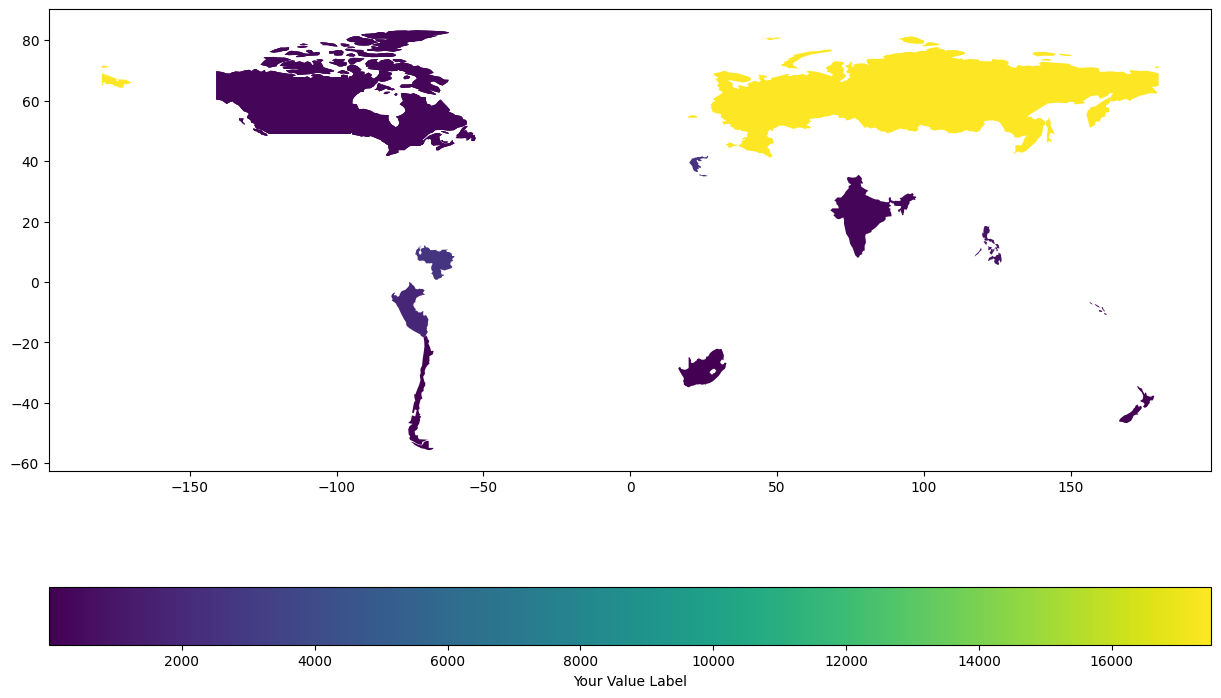

In [142]:
# Realizamos un merge de nuestro df con el nuevo df world para poder tener todo en un mismo df
merged = world.merge(df_oil_geo, left_on='SOVEREIGNT', right_on='Country') # utilizo solo on= cuando es el mismo nombre

# Creamos un mapa utilizando matplotlib y geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Max Tonnes', ax=ax, legend=True,
            legend_kwds={'label': "Your Value Label", 'orientation': "horizontal"})

plt.show()

In [143]:
# Verificamos que hay unos paises que no aparecen
df_oil_geo.value_counts('Country')

Country
United States                                                            15
Canada                                                                    3
South Africa                                                              2
Brazil                                                                    1
Chile                                                                     1
India                                                                     1
International Waters (near France)                                        1
East China Sea (associated with multiple countries in East Asia)          1
Greece                                                                    1
Israel and Lebanon (since this location refers to a shared shoreline)     1
Isle of Man (self-governing British Crown dependency)                     1
New Zealand                                                               1
Peru                                                                      1
Russ

Hay unos valores que no nos aparece, por lo tanto hay que realizar una limpieza

In [144]:
df_oil_geo.replace('United States', 'United States of America', inplace=True)
df_oil_geo.value_counts('Country')

Country
United States of America                                                 15
Canada                                                                    3
South Africa                                                              2
Brazil                                                                    1
Chile                                                                     1
India                                                                     1
International Waters (near France)                                        1
East China Sea (associated with multiple countries in East Asia)          1
Greece                                                                    1
Israel and Lebanon (since this location refers to a shared shoreline)     1
Isle of Man (self-governing British Crown dependency)                     1
New Zealand                                                               1
Peru                                                                      1
Russ

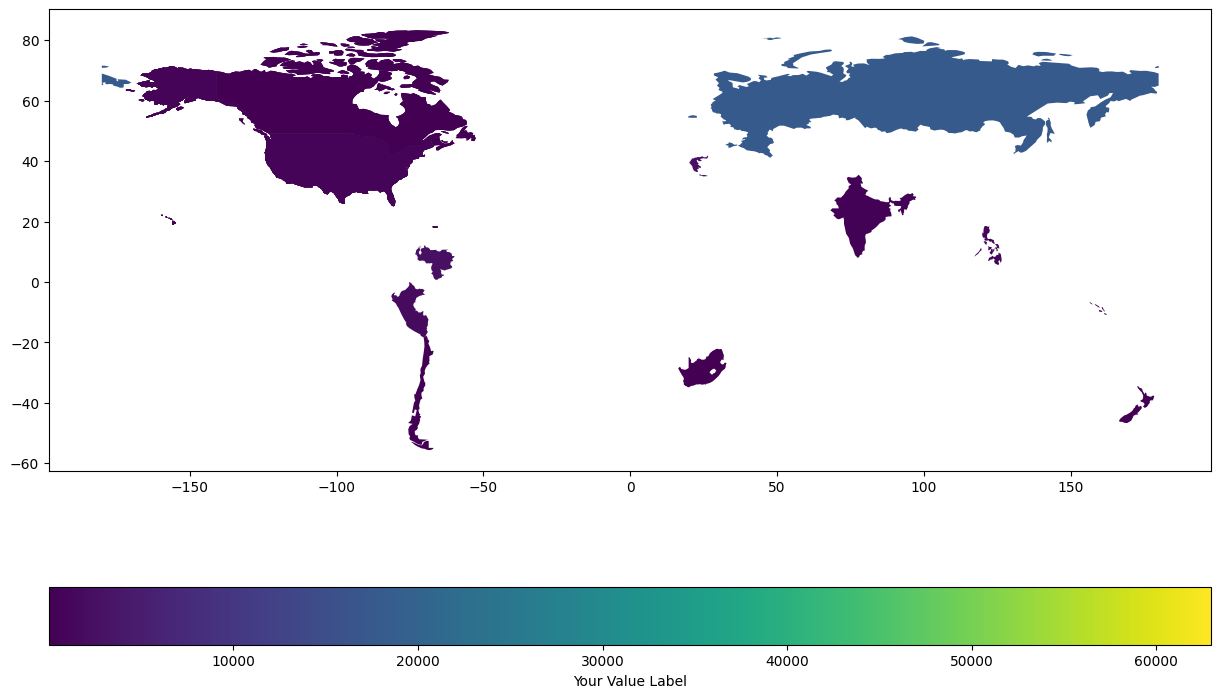

In [145]:
# Realizamos un merge de nuestro df con el nuevo df world para poder tener todo en un mismo df
merged = world.merge(df_oil_geo, left_on='SOVEREIGNT', right_on='Country') # Pude haber utilizando 'NAME_EN' en lugar de 'SOVEREIGNT'

# Creamos un mapa utilizando matplotlib y geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Max Tonnes', ax=ax, legend=True,
            legend_kwds={'label': "Your Value Label", 'orientation': "horizontal"})

plt.show()

Buscar geopandas en  google

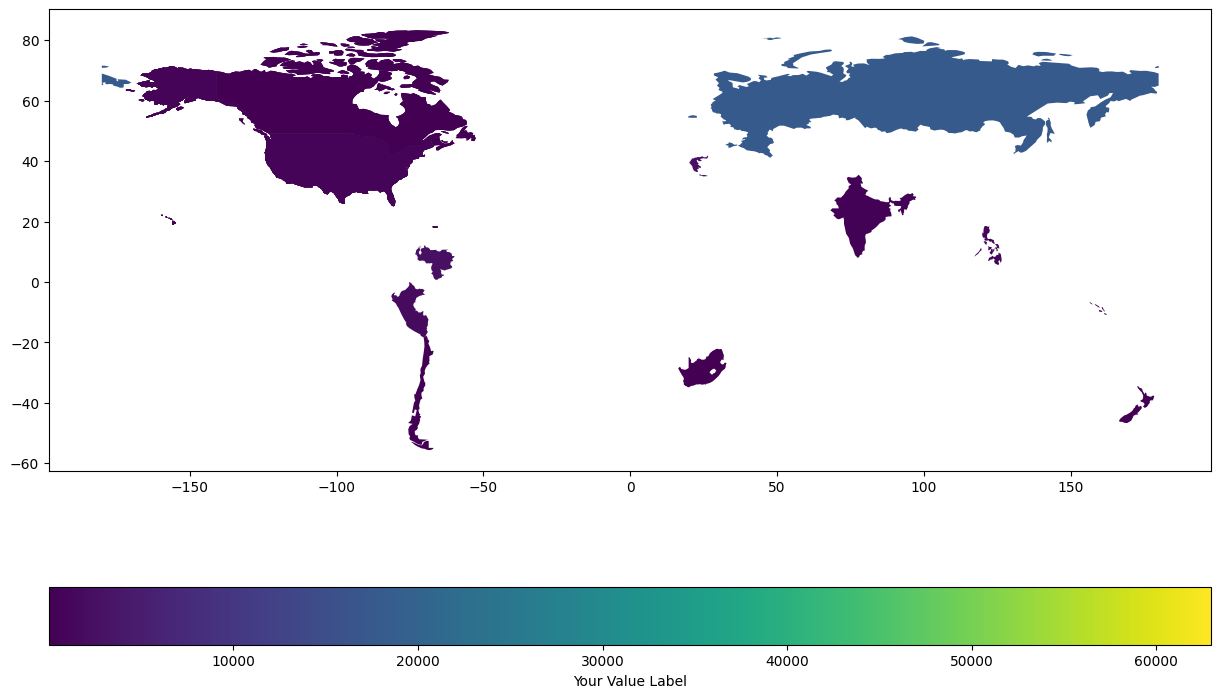

In [146]:
# Creamos un mapa utilizando matplotlib y geopandas
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Max Tonnes', ax=ax, legend=True,  #Vamos a generar un plot. Al reconocer que es un objeto de geopandas lo lee de manera diferente
            legend_kwds={'label': "Your Value Label", 'orientation': "horizontal"})

plt.show()

In [147]:
import branca as bc

In [148]:
# Metodo explore
# Debemos intalar en la terminal pip install folium matplotlib mapclassify
world.explore(clolumna='SOVEREIGNT') # En nuestro caso no es name

In [149]:
merged.explore(clolumna='SOVEREIGNT', tooltip='Max Tonnes')

Como me esta mostrando solo un dato (posiblemente el primero), necesito que me los agrupe

In [150]:
df_oil_geo_agg = df_oil_geo.groupby('Country')[['Max Tonnes', 'Min Tonnes']].sum()
df_oil_geo_agg.replace('United States', 'United States of America', inplace=True)
merged = world.merge(df_oil_geo_agg, left_on='NAME_EN', right_on='Country') # Aqui si utilizamos el NAME_EN'


In [151]:
merged.explore(clolumna='NAME_EN')

# Análisis univariable, bivariable y multivariable

### Análisis univariable

El análisis univariable forma parte de la estadística descriptiva y tal como su nombre lo indica, se enfoca en la observación de una sola variable a la vez. Este tipo de análisis es fundamental para comprender la distribución, tendencia central, dispersión y la forma general de los datos.

Las medidas comunes incluyen:

• Medidas de tendencia central: como la media, la mediana y la moda, que describen el punto central alrededor del cual se distribuyen los datos.

• Medidas de dispersión: como el rango, la varianza, la desviación estándar y el rango intercuartílico, que indican qué tan esparcidos están los datos alrededor de la medida central.

• Forma de la distribución: analizada a través de la asimetría (skewness) y curtosis, que describen la simetría y la "altitud" de la distribución de los datos, respectivamente.

• La visualización juega un papel crucial en el análisis univariable. Histogramas, gráficos de cajas, gráficos de densidad y gráficos de barras para datos categóricos son algunas de las herramientas visuales más utilizadas para ilustrar la distribución de los datos.

Para el análisis univariable y la visualización de distribuciones, Pandas y NumPy ofrecen una variedad de métodos que te permiten explorar y representar tus datos. A continuación, se detallan algunos métodos que hemos visto en clases anteriores y que te serán útiles en este enfoque.

PANDAS

Descripción estadística: DataFrame.describe() proporciona estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos.

Histogramas: DataFrame.hist() permite visualizar la distribución de una variable numérica mediante un histograma.

Gráficos de cajas: DataFrame.boxplot() es útil para visualizar la distribución de datos a través de cuartiles y detectar valores atípicos.

Gráficos de densidad: DataFrame.plot(kind='density') muestra la distribución continua de los datos, también conocida como el estimado de densidad kernel (KDE).

NUMPY
Histograma computacional: numpy.histogram() calcula el histograma de un conjunto de datos sin dibujar, lo que es útil si solo necesitas los conteos de datos para análisis posteriores.

Estadísticas descriptivas: NumPy tiene funciones como numpy.mean(), numpy.median(), numpy.std(), y numpy.percentile() que te permiten calcular estadísticas descriptivas específicas para entender mejor la distribución de tus datos.

Visualización con Matplotlib y Seaborn

Para complementar a Pandas y NumPy, también podemos utilizar las bibliotecas de visualización ya aprendidas (Matplotlib y Seaborn), lo cual nos permite representación más avanzada y atractiva al usuario.

MATPLOTLIB

matplotlib.pyplot.hist() para crear histogramas.
matplotlib.pyplot.boxplot() para hacer gráficos de cajas.

SEABORN
seaborn.distplot() para histogramas y curvas de densidad combinados.
seaborn.boxplot() para una versión más estilizada de gráficos de cajas.

seaborn.violinplot() combina aspectos de gráficos de cajas y gráficos de densidad.

seaborn.countplot() es ideal para mostrar el conteo de categorías.

#### ¡Veamos un ejemplo!

Veamos un ejemplo donde se aplican algunos de los métodos mencionados anteriormente, vistos en clases anteriores:

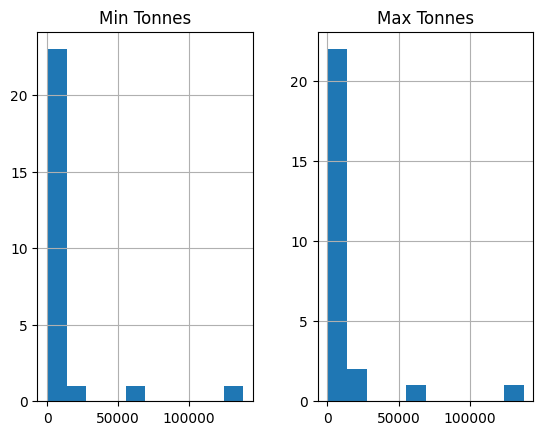

In [161]:
df.hist()
plt.show()

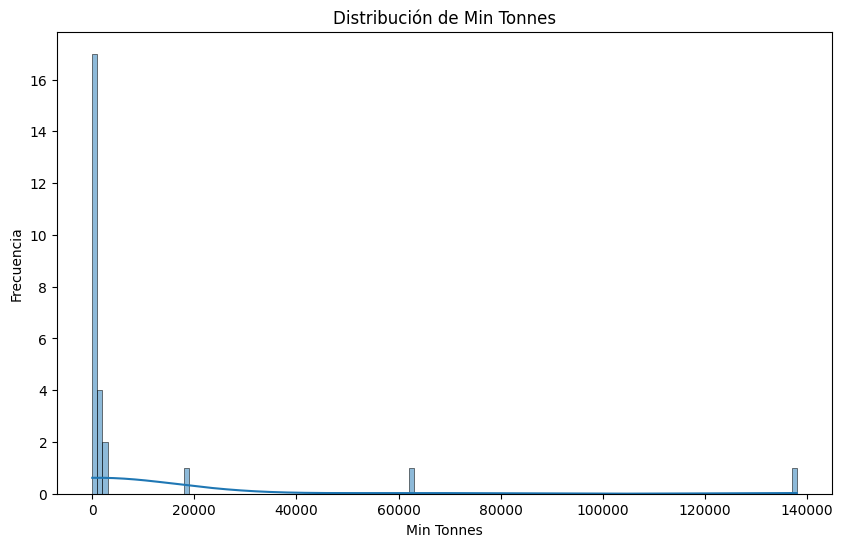

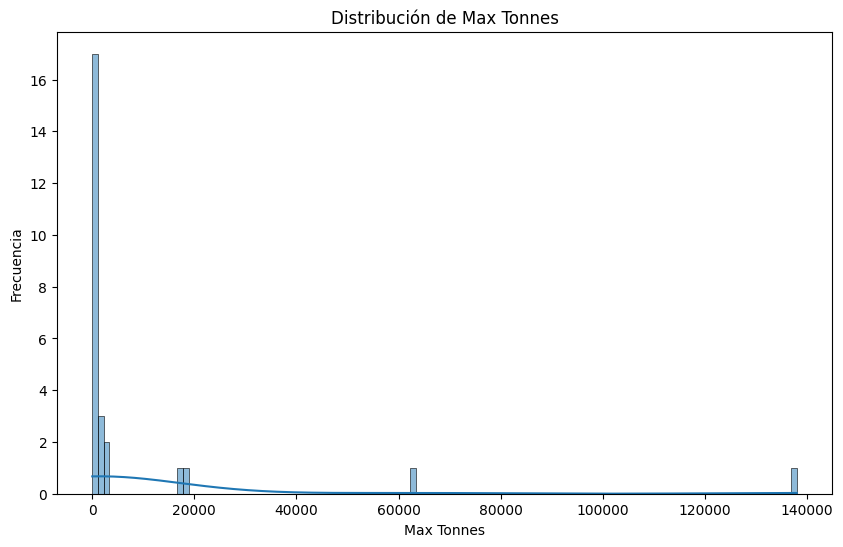

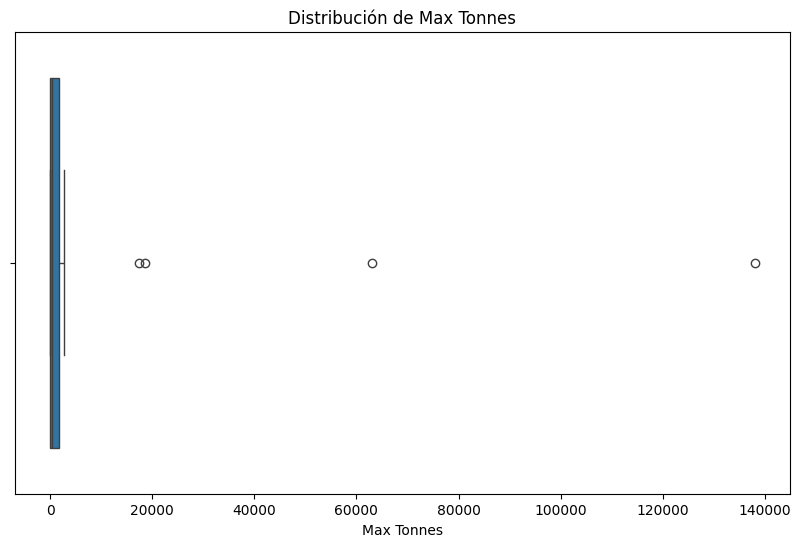

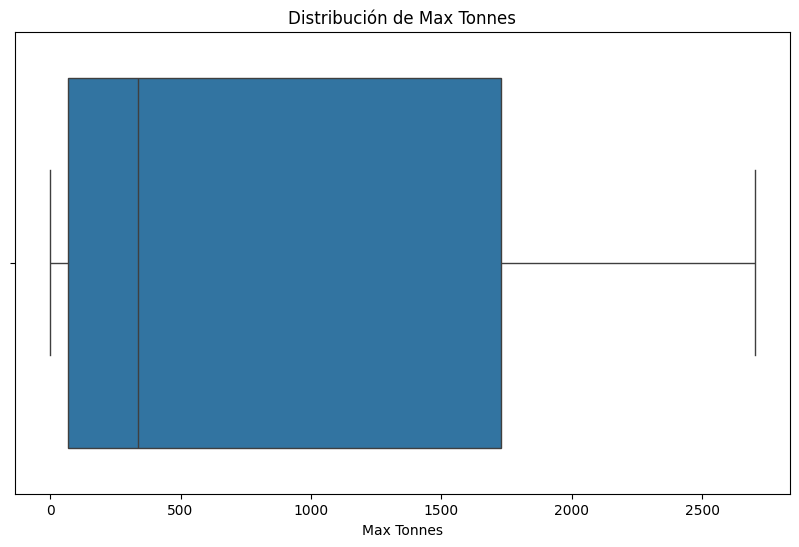

          Min Tonnes     Max Tonnes
count      26.000000      26.000000
mean     9022.823462    9640.737308
std     29164.424786   29167.295121
min         0.200000       0.270000
25%        65.985000      67.235000
50%       337.710000     337.710000
75%      1550.292500    1726.760000
max    138000.000000  138000.000000


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos nuestro dataset en un df
df = pd.read_csv('datos_oil.csv')

# Visualización de la distribución de 'Min Tonnes' utilizando histograma y KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(df['Min Tonnes'], kde=True)
plt.title('Distribución de Min Tonnes')
plt.xlabel('Min Tonnes')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de 'Max Tonnes' utilizando histograma y KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(df['Max Tonnes'], kde=True)
plt.title('Distribución de Max Tonnes')
plt.xlabel('Max Tonnes')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de 'Max Tonnes' utilizando un gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Max Tonnes']) # Podemos utilizar el showfliers = False para que no nos muestre los datos atipicos
plt.title('Distribución de Max Tonnes')
plt.xlabel('Max Tonnes')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Max Tonnes'], showfliers = False) # Podemos utilizar el showfliers = False para que no nos muestre los 
# datos atipicos y podemos apreciar mejor ante la gran dispersion de los otros datos
plt.title('Distribución de Max Tonnes')
plt.xlabel('Max Tonnes')
plt.show()

# Descripción estadística de las columnas numéricas
print(df[['Min Tonnes', 'Max Tonnes']].describe())

# La salida incluirá conteo, media, desviación estándar, mínimo, máximo y cuartiles de las columnas 'Min Tonnes' y 'Max Tonnes'.


(array([23.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.0000000e-01, 1.3800180e+04, 2.7600160e+04, 4.1400140e+04,
        5.5200120e+04, 6.9000100e+04, 8.2800080e+04, 9.6600060e+04,
        1.1040004e+05, 1.2420002e+05, 1.3800000e+05]),
 <BarContainer object of 10 artists>)

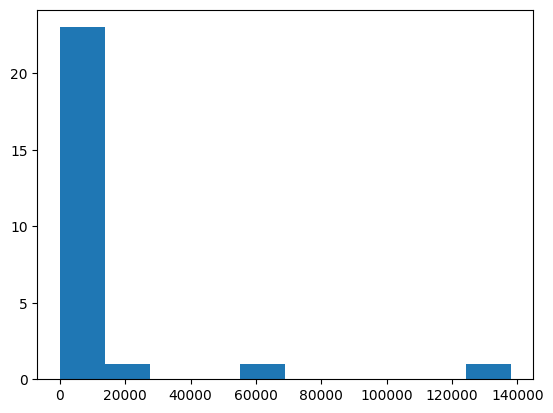

In [ ]:
bins=plt.hist(df['Min Tonnes'])
bins

In [ ]:
# Realizamos una mascara con derrames mayores a 13800 y generar una alerta
mask = df['Min Tonnes'] > 13800
alerta = df[mask]
alerta

,Spill / Vessel,Location,Dates,Min Tonnes,Max Tonnes,Owner,Country
1,2022 Keystone Pipeline oil spill,"United States, Washington County, Kansas",7 December 2022,18516.94,18516.94,TC Energy,United States
8,2020 Colonial Pipeline oil spill,"United States, North Carolina, Huntersville",14 August 2020,63000.00,63000.00,Colonial Pipeline,United States
26,Sanchi oil tanker collision with CF Crystal,East China Sea,6 January 2018,138000.00,138000.00,National Iranian Tanker Company,East China Sea (associated with multiple count...


In [ ]:
df[['Min Tonnes', 'Max Tonnes']].describe()

,Min Tonnes,Max Tonnes
count,26.000000,26.000000
mean,9022.823462,9640.737308
std,29164.424786,29167.295121
min,0.200000,0.270000
25%,65.985000,67.235000
50%,337.710000,337.710000
75%,1550.292500,1726.760000
max,138000.000000,138000.000000


In [ ]:
df.describe()

,Min Tonnes,Max Tonnes
count,26.000000,26.000000
mean,9022.823462,9640.737308
std,29164.424786,29167.295121
min,0.200000,0.270000
25%,65.985000,67.235000
50%,337.710000,337.710000
75%,1550.292500,1726.760000
max,138000.000000,138000.000000


Aquí, se proporciona una visión inicial profunda de la distribución y características centrales de las cantidades de petróleo derramadas reportadas en el conjunto de datos, identificando patrones, distribuciones y posibles anomalías a través de visualizaciones y estadísticas descriptivas.

Este código realiza varias tareas de análisis exploratorio de datos (EDA) y visualización utilizando las bibliotecas pandas, NumPy, matplotlib y seaborn, centradas en el análisis de las características de las variables Min Tonnes y Max Tonnes de un conjunto de datos relacionado con derrames de petróleo. 

A continuación explicaremos paso a paso su funcionamiento y propósito:

1 Importación de Bibliotecas: 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

2 Carga del dataset: se carga el archivo brindado datos_oil.csv en un DataFrame de pandas (df).

3 Visualización de Min Tonnes: se crea un histograma de la columna Min Tonnes con una estimación de densidad kernel (KDE) superpuesta. El KDE proporciona una visualización suave de la distribución. El histograma, por su parte, muestra la frecuencia de diferentes rangos de toneladas derramadas, permitiendo identificar rápidamente la distribución de los datos, como la simetría, asimetría, y la presencia de modas.

La figura se configura con un tamaño de 10x6 pulgadas. El título y las etiquetas de los ejes son configurados para mejorar la comprensión de la visualización.

4 Visualización de Max Tonnes: se utiliza un gráfico de caja (boxplot) para visualizar la distribución de la columna Max Tonnes. Los gráficos de caja resumen la distribución de los datos a través de cuartiles y permiten identificar fácilmente valores atípicos, la mediana, y la dispersión de los datos.

Al igual que con el histograma, la figura se configura con un tamaño de 10x6 pulgadas y se añaden título y etiqueta del eje X.

5 Descripción estadística: por último, se utiliza el método describe() para obtener un resumen estadístico de las columnas Min Tonnes y Max Tonnes. Este resumen incluye el conteo (número de observaciones), media, desviación estándar, mínimo, máximo, y los cuartiles (25%, 50% - que es la mediana, y 75%) de los datos. Esto proporciona una comprensión rápida de la distribución central, dispersión y forma de la distribución de los datos.

### Análisis bivariable y multivariable

El análisis bivariable y multivariable son extensiones del análisis univariable, en este caso cruciales para entender las relaciones entre dos o más variables. Estos tipos de análisis suelen volverse complejos tanto en su desarrollo técnico como en el abordaje conceptual.

Si bien es importante que conozcas algunos términos relevantes, la profundidad del abordaje es propio de un Data Scientist.

ANÁLISIS BIVARIABLE

Examina la relación entre dos variables. Esta técnica es útil para determinar la fuerza y la dirección de la asociación que puede existir entre las variables. Esto permite comprender cómo una variable puede predecir o afectar a otra. 

Por ejemplo, en la medicina, el análisis bivariable puede mostrar cómo un tratamiento afecta los resultados de salud. En los negocios, puede revelar cómo los cambios de precios influyen en las ventas.

Métodos:

Correlaciones: usar DataFrame.corr() en Pandas para calcular la correlación de Pearson, que mide la relación lineal entre variables.

Gráficos de dispersión: utilizar matplotlib.pyplot.scatter() o seaborn.scatterplot() para visualizar cómo se relacionan las variables entre sí.

Gráficos de líneas: en caso de datos temporales, seaborn.lineplot() podría ser útil para ver tendencias entre dos variables a lo largo del tiempo.

ANÁLISIS MULTIVARIABLE
El análisis multivariable abarca más de dos variables al mismo tiempo. Este tipo de análisis puede ser útil para controlar las variables de confusión y entender las relaciones más complejas. Es fundamental para determinar la interdependencia de variables y es ampliamente utilizado para modelos predictivos y de clasificación en la ciencia de datos. 

Métodos:

Matrices de correlación: con DataFrame.corr() y seaborn.heatmap(), se puede visualizar la correlación entre múltiples variables.

Gráficos de pares: seaborn.pairplot() genera un conjunto de gráficos de dispersión para cada par de variables, lo que es ideal para la exploración inicial de datos.

Análisis de componentes principales (PCA): aunque es más avanzado, PCA puede realizarse con sklearn.decomposition.PCA para reducir la dimensionalidad de los datos multivariables y ver las relaciones en un espacio de menor dimensión (no lo trataremos en esta instancia de aprendizaje como data analyst).

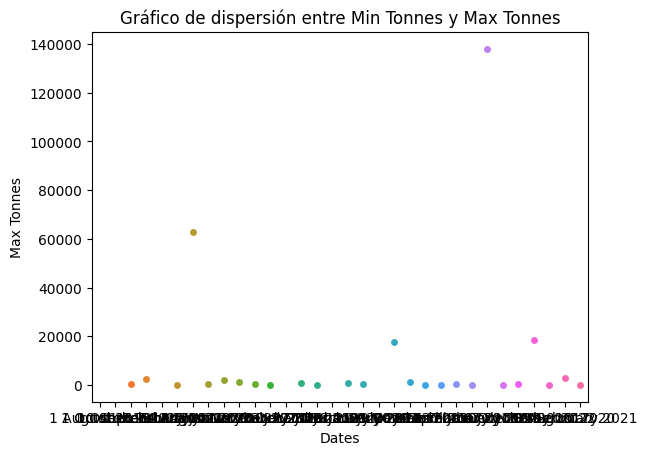

In [ ]:
df_sorted = df.sort_values(by='Dates')
sns.stripplot(x='Dates', y='Max Tonnes', data=df_sorted, hue='Dates')
plt.title('Gráfico de dispersión entre Min Tonnes y Max Tonnes')
plt.show()

Para solucionar el problema de las fechas que no se ven, realizamos el siguiente paso, quedando de la siguiente manera:

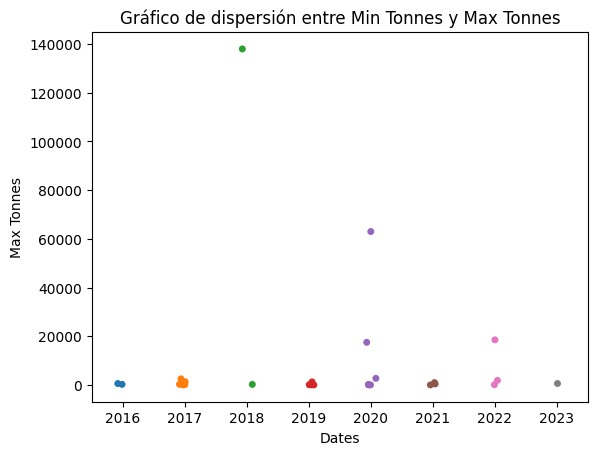

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d %B %Y') # Lo paso a fecha y le digo cual es el formato
df['Dates'] = df['Dates'].dt.strftime('%Y') # Dejamos los datos solo por años (que me deje solo el año)

df_sorted = df.sort_values(by='Dates') # Aqui lo que estoy haciendo es que me lo ordenen para que me lo muestren de manera ascendente
sns.stripplot(x='Dates', y='Max Tonnes', data=df_sorted, hue='Dates') # El Hue para que me cambie el color en los puntos
plt.title('Gráfico de dispersión entre Min Tonnes y Max Tonnes')
plt.show()


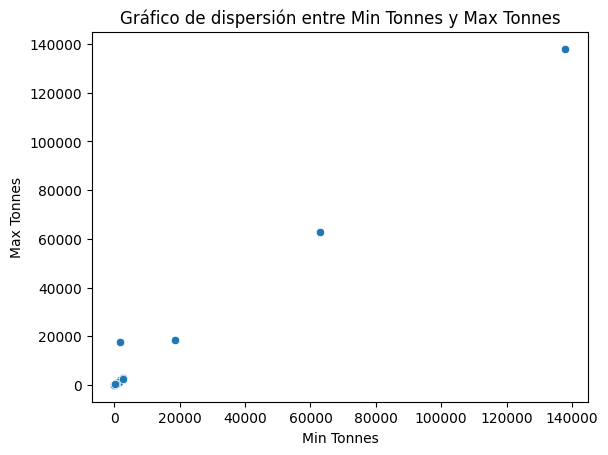

            Min Tonnes  Max Tonnes
Min Tonnes      1.0000      0.9944
Max Tonnes      0.9944      1.0000


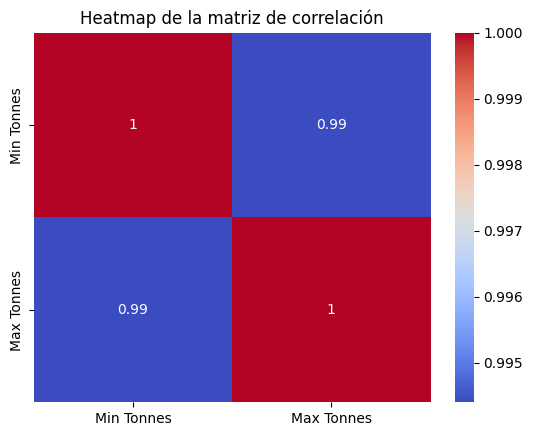

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que los datos estén en el mismo directorio que tu notebook o proporciona la ruta completa
df = pd.read_csv('datos_oil.csv')

# Análisis bivariable utilizando un gráfico de dispersión en Seaborn
sns.scatterplot(x='Min Tonnes', y='Max Tonnes', data=df)
plt.title('Gráfico de dispersión entre Min Tonnes y Max Tonnes')
plt.show()

# Correlación de Pearson con Pandas
correlation_matrix = df[['Min Tonnes', 'Max Tonnes']].corr()
print(correlation_matrix)

# Visualización de la matriz de correlación con un heatmap en Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de la matriz de correlación')
plt.show()


El script dado es útil para explorar visualmente y cuantitativamente la relación entre las cantidades mínimas y máximas de petróleo derramadas en